<a href="https://colab.research.google.com/github/ajineldho/Robot-Path-Planning-mini-project/blob/main/3D_Kinematic_Path_Simulation_of_ABB_IRB_2400_Using_Joint_Output_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

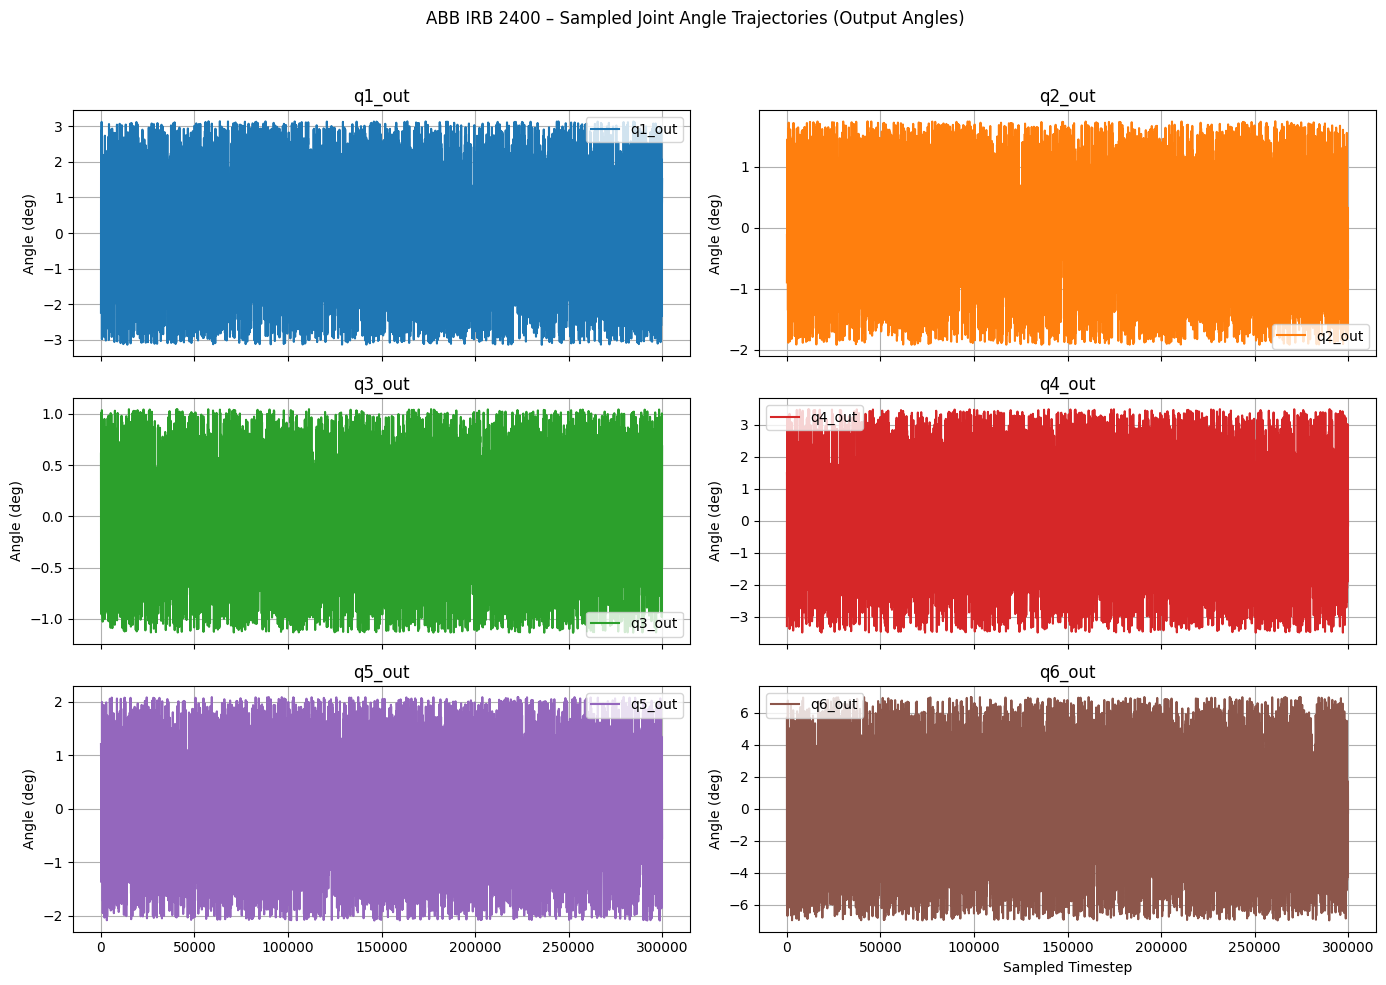

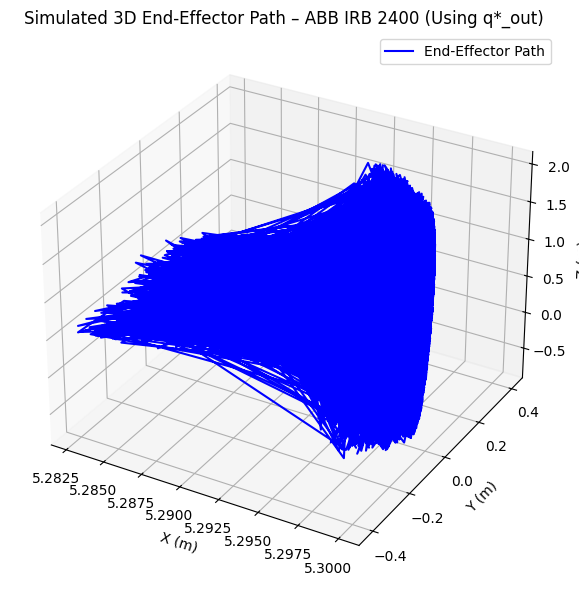

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 📥 Load dataset
csv_file = "/kaggle/input/abb-irb-2400-arm-robot-kinematics-dataset/datasetIRB2400.csv"
df = pd.read_csv(csv_file)

# 🔍 Sample for visualization clarity
sample_df = df.iloc[::50]

# 🎯 Plot each joint separately
fig, axs = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
axs = axs.flatten()

for i in range(6):
    joint = f"q{i+1}_out"  # Use output angles for more realistic motion
    axs[i].plot(sample_df[joint], label=joint, color=f"C{i}")
    axs[i].set_title(joint)
    axs[i].set_ylabel("Angle (deg)")
    axs[i].legend()
    axs[i].grid(True)

axs[-1].set_xlabel("Sampled Timestep")
plt.suptitle("ABB IRB 2400 – Sampled Joint Angle Trajectories (Output Angles)")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 🤖 Simulated Forward Kinematics (3 DOF with larger links)
L = [2.0, 1.8, 1.5]  # Increased for better visualization
positions = []

for i in range(len(df)):
    theta1 = np.deg2rad(df['q1_out'][i])
    theta2 = np.deg2rad(df['q2_out'][i])
    theta3 = np.deg2rad(df['q3_out'][i])

    x = L[0]*np.cos(theta1) + L[1]*np.cos(theta1 + theta2) + L[2]*np.cos(theta1 + theta2 + theta3)
    y = L[0]*np.sin(theta1) + L[1]*np.sin(theta1 + theta2) + L[2]*np.sin(theta1 + theta2 + theta3)
    z = df['z'][i] / 1000.0  # Convert mm to meters

    positions.append([x, y, z])

positions = np.array(positions)

# 🧭 Plot 3D end-effector path
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], label='End-Effector Path', color='blue')
ax.set_title("Simulated 3D End-Effector Path – ABB IRB 2400 (Using q*_out)")
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_zlabel("Z (m)")
ax.legend()
plt.tight_layout()
plt.show()



In [11]:
print("X range:", positions[:,0].min(), "to", positions[:,0].max())
print("Y range:", positions[:,1].min(), "to", positions[:,1].max())
print("Z range:", positions[:,2].min(), "to", positions[:,2].max())


X range: 5.282751691232267 to 5.299998846099868
Y range: -0.41374984169763296 to 0.4076080935438962
Z range: -0.8566655 to 2.1012512
